In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from pathlib import Path
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import GradientBoostingClassifier

In [3]:
file_path = Path('filled_final_table.csv')
df = pd.read_csv(file_path)
df

,Date,Year,County,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,median_square_feet,average_listing_price,total_listing_count,violent_crime_rate,30_Year_Fixed_Rate,Number_of_Schools,median_listing_price_mm,Number_of_Parks
0,2022-06,2022,Alamance,382500,298,18,452,12,108,2112,443362,644,NaN,5.52,NaN,0.034063,54.0
1,2022-06,2022,Alexander,312450,34,35,28,0,20,1942,370648,59,NaN,5.52,NaN,0.016428,25.0
2,2022-06,2022,Alleghany,389000,54,39,24,0,20,1904,422802,92,NaN,5.52,NaN,-0.038200,0.0
3,2022-06,2022,Anson,170000,22,34,16,0,8,1502,262240,48,NaN,5.52,NaN,0.218638,3.0
4,2022-06,2022,Ashe,485000,76,31,48,0,20,1907,592879,137,NaN,5.52,NaN,-0.088346,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7191,2016-07,2016,Wayne,165000,593,83,104,4,92,1868,177275,603,442,3.44,88.0,NaN,36.0
7192,2016-07,2016,Wilkes,234900,320,116,44,4,48,2146,337545,380,208.4,3.44,52.0,NaN,34.0
7193,2016-07,2016,Wilson,117500,512,52,92,8,80,1922,150833,646,398.9,3.44,87.0,NaN,70.0
7194,2016-07,2016,Yadkin,210000,146,142,20,0,8,2460,285062,161,231.2,3.44,16.0,NaN,4.0


In [4]:
#conditional based column = np.where(df['median_listing_price_mm'](x>=0), 'yes(1)', 'no(0)')
df['Price_Status'] = np.where(df['median_listing_price_mm']>=0, 1, 0)

In [5]:
df['violent_crime_rate']= df['violent_crime_rate'].str.replace(',','').astype(float)

In [6]:
df_clean = df.drop(['Date'], axis=1)
df_clean.dtypes

Year                         int64
County                      object
median_listing_price         int64
active_listing_count         int64
median_days_on_market        int64
new_listing_count            int64
price_increased_count        int64
price_reduced_count          int64
median_square_feet           int64
average_listing_price        int64
total_listing_count          int64
violent_crime_rate         float64
30_Year_Fixed_Rate         float64
Number_of_Schools          float64
median_listing_price_mm    float64
Number_of_Parks            float64
Price_Status                 int32
dtype: object

In [ ]:
#filter_df = df_clean[df_clean['Year'] <2019]
#filter_df.head()

In [7]:
# Load the data
columns = [
    "Year", "County", 
    "active_listing_count", "median_days_on_market", "new_listing_count",
    "price_increased_count", "price_reduced_count", "median_square_feet",
    "total_listing_count", "violent_crime_rate",
    "30_Year_Fixed_Rate", "Number_of_Schools",
    "Number_of_Parks", "Price_Status"
]

df = df_clean.loc[:, columns].copy()


# Drop the null rows
df = df.dropna()




df.reset_index(inplace=True, drop=True)

df

,Year,County,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,median_square_feet,total_listing_count,violent_crime_rate,30_Year_Fixed_Rate,Number_of_Schools,Number_of_Parks,Price_Status
0,2018,Alamance,761,78,172,28,116,2060,843,419.9,4.64,94.0,54.0,1
1,2018,Alexander,90,102,8,0,16,1924,103,221.9,4.64,49.0,25.0,1
2,2018,Alleghany,420,227,4,0,20,1886,438,114.8,4.64,11.0,0.0,0
3,2018,Anson,65,100,8,0,12,1500,78,568.4,4.64,15.0,3.0,0
4,2018,Beaufort,272,151,32,0,48,1950,337,221.2,4.64,25.0,18.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2605,2016,Wayne,593,83,104,4,92,1868,603,442.0,3.44,88.0,36.0,0
2606,2016,Wilkes,320,116,44,4,48,2146,380,208.4,3.44,52.0,34.0,0
2607,2016,Wilson,512,52,92,8,80,1922,646,398.9,3.44,87.0,70.0,0
2608,2016,Yadkin,146,142,20,0,8,2460,161,231.2,3.44,16.0,4.0,0


In [8]:
# defining features

df.columns

Index(['Year', 'County', 'active_listing_count', 'median_days_on_market',
       'new_listing_count', 'price_increased_count', 'price_reduced_count',
       'median_square_feet', 'total_listing_count', 'violent_crime_rate',
       '30_Year_Fixed_Rate', 'Number_of_Schools', 'Number_of_Parks',
       'Price_Status'],
      dtype='object')

In [9]:
selected_features = df[['active_listing_count', 'median_days_on_market', 'new_listing_count', 'price_increased_count', 'price_reduced_count', 'median_square_feet', 'total_listing_count', 'violent_crime_rate', '30_Year_Fixed_Rate',
       'Number_of_Schools', 'Number_of_Parks']]
selected_features.shape

(2610, 11)

In [10]:
# Defining predictor and target features to X and y respectively.
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = selected_features
y = df[['Price_Status']].values.reshape(-1,1)

print("Shape: ", X.shape, y.shape)

Shape:  (2610, 11) (2610, 1)


In [11]:
# Using sklearn's 'train_test_split' to split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42)
print("Shape: ", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Shape:  (1957, 11) (1957, 1) (653, 11) (653, 1)


In [12]:
# Scale the data
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

In [13]:
gradientBoostedTree = GradientBoostingClassifier()
gradientBoostedTree

GradientBoostingClassifier()

In [14]:
gradientBoostedTree.fit(X_train_scaled, y_train.flatten())

GradientBoostingClassifier()

In [15]:
print(f"Training Data Score: {gradientBoostedTree.score(X_train, y_train)}")
print(f"Testing Data Score: {gradientBoostedTree.score(X_test, y_test)}")

Training Data Score: 0.4389371486969852
Testing Data Score: 0.46401225114854516


In [16]:
gradientBoostedPredictions = gradientBoostedTree.predict(X_test_scaled)

In [17]:
gradientBoostedPredictProba = gradientBoostedTree.predict_proba(X_test_scaled)[:,1]

In [18]:
# Print classification report
print(classification_report(y_test.flatten(), gradientBoostedPredictions,
                            target_names=["Price Increase", "Price Decrease"]))
print("Accuracy:", accuracy_score(y_test.flatten(), gradientBoostedPredictions))

                precision    recall  f1-score   support

Price Increase       0.54      0.32      0.40       303
Price Decrease       0.56      0.76      0.65       350

      accuracy                           0.56       653
     macro avg       0.55      0.54      0.52       653
  weighted avg       0.55      0.56      0.53       653

Accuracy: 0.555895865237366


In [19]:
print("Gradient Boosting Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), gradientBoostedPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), gradientBoostedPredictions))
print("Recall: ",recall_score(y_test.flatten(), gradientBoostedPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), gradientBoostedPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten().astype(float), gradientBoostedPredictions).astype(float))

Gradient Boosting Classifier
Accuracy:  0.555895865237366
Precision:  0.5632911392405063
Recall:  0.7628571428571429
F1-Score:  0.6480582524271846
AUC score:  0.5398444130127298


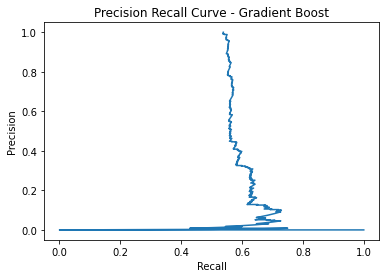

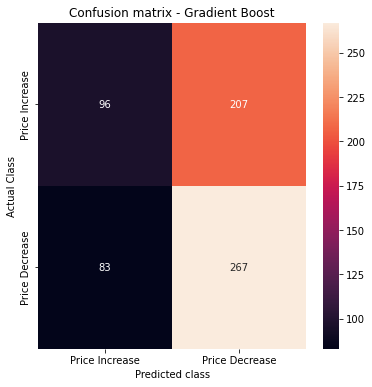

In [20]:
p, r, t = precision_recall_curve(y_test.flatten(), gradientBoostedPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gradient Boost')

confusionMatrix = confusion_matrix(y_test.flatten(), gradientBoostedPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Price Increase', 'Price Decrease'],  
            yticklabels = ['Price Increase', 'Price Decrease'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gradient Boost") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show()

In [21]:
gradientBoostedTree.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [22]:
gradientBoostedParamGrid = {#'loss': ['deviance', 'exponential'],
                           'n_estimators': [100, 200, 300, 400],
                           'max_depth': [1,2]}
gradientBoostedGrid = GridSearchCV(gradientBoostedTree, gradientBoostedParamGrid, verbose=3)

In [23]:
# Train the model with GridSearch
gradientBoostedGrid.fit(X_train_scaled, y_train.flatten())

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .....max_depth=1, n_estimators=100;, score=0.574 total time=   0.1s
[CV 2/5] END .....max_depth=1, n_estimators=100;, score=0.602 total time=   0.1s
[CV 3/5] END .....max_depth=1, n_estimators=100;, score=0.593 total time=   0.1s
[CV 4/5] END .....max_depth=1, n_estimators=100;, score=0.609 total time=   0.1s
[CV 5/5] END .....max_depth=1, n_estimators=100;, score=0.588 total time=   0.1s
[CV 1/5] END .....max_depth=1, n_estimators=200;, score=0.569 total time=   0.3s
[CV 2/5] END .....max_depth=1, n_estimators=200;, score=0.602 total time=   0.2s
[CV 3/5] END .....max_depth=1, n_estimators=200;, score=0.591 total time=   0.2s
[CV 4/5] END .....max_depth=1, n_estimators=200;, score=0.596 total time=   0.2s
[CV 5/5] END .....max_depth=1, n_estimators=200;, score=0.568 total time=   0.3s
[CV 1/5] END .....max_depth=1, n_estimators=300;, score=0.582 total time=   0.5s
[CV 2/5] END .....max_depth=1, n_estimators=300;,

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 2],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=3)

In [24]:
print(gradientBoostedGrid.best_params_)
print(gradientBoostedGrid.best_score_)

{'max_depth': 1, 'n_estimators': 100}
0.5932603476173078


In [25]:
# Make predictions with hyperparameter tuned model
GradientBoostGridPredictions = gradientBoostedGrid.predict(X_test_scaled)

In [26]:
# Print Classification Report
print(classification_report(y_test.flatten(), GradientBoostGridPredictions,
                           target_names=["Price Increase", "Price Decrease"]))

                precision    recall  f1-score   support

Price Increase       0.54      0.21      0.31       303
Price Decrease       0.55      0.84      0.67       350

      accuracy                           0.55       653
     macro avg       0.54      0.53      0.49       653
  weighted avg       0.55      0.55      0.50       653



In [27]:
hypertunedGradientBoostModel = GradientBoostingClassifier(max_depth = 1, n_estimators =100)
hypertunedGradientBoostModel

GradientBoostingClassifier(max_depth=1)

In [28]:
hypertunedGradientBoostModel.fit(X_train_scaled, y_train.flatten())

GradientBoostingClassifier(max_depth=1)

In [29]:
print(f"Training Data Score: {hypertunedGradientBoostModel.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {hypertunedGradientBoostModel.score(X_test_scaled, y_test)}")

Training Data Score: 0.6162493612672458
Testing Data Score: 0.5497702909647779


In [30]:
hypertunedGradientBoostModelPredictions = hypertunedGradientBoostModel.predict(X_test_scaled)

In [31]:
hypertunedGradientBoostPredictProba = hypertunedGradientBoostModel.predict_proba(X_test_scaled)[:,1]

In [32]:
# Calculate classification report
print(classification_report(y_test.flatten(), hypertunedGradientBoostModelPredictions,
                            target_names=["Price Increase", "Price Decrease"]))

                precision    recall  f1-score   support

Price Increase       0.54      0.21      0.31       303
Price Decrease       0.55      0.84      0.67       350

      accuracy                           0.55       653
     macro avg       0.54      0.53      0.49       653
  weighted avg       0.55      0.55      0.50       653



Gradient Boosting Classifier
Accuracy:  0.5497702909647779
Precision:  0.5526315789473685
Recall:  0.84
F1-Score:  0.6666666666666667
AUC score:  0.5272607260726072
                precision    recall  f1-score   support

Price Increase       0.54      0.21      0.31       303
Price Decrease       0.55      0.84      0.67       350

      accuracy                           0.55       653
     macro avg       0.54      0.53      0.49       653
  weighted avg       0.55      0.55      0.50       653



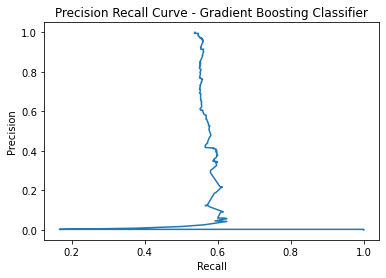

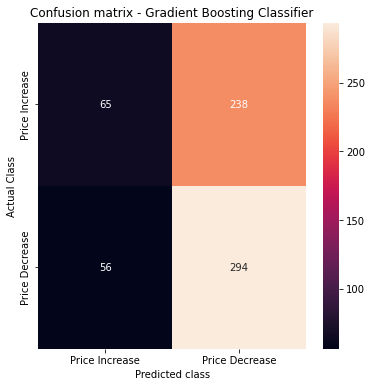

In [33]:
print("Gradient Boosting Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), hypertunedGradientBoostModelPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), hypertunedGradientBoostModelPredictions))
print("Recall: ",recall_score(y_test.flatten(), hypertunedGradientBoostModelPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), hypertunedGradientBoostModelPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), hypertunedGradientBoostModelPredictions))
print(classification_report(y_test.flatten(), hypertunedGradientBoostModelPredictions,
                            target_names=["Price Increase", "Price Decrease"]))

p, r, t = precision_recall_curve(y_test.flatten(), hypertunedGradientBoostPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gradient Boosting Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), hypertunedGradientBoostModelPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Price Increase', 'Price Decrease'],  
            yticklabels = ['Price Increase', 'Price Decrease'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gradient Boosting Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show()

In [34]:
feature_names = selected_features.columns
sorted(zip(hypertunedGradientBoostModel.feature_importances_, feature_names), reverse=True)

[(0.7683309626055201, '30_Year_Fixed_Rate'),
 (0.05764289985724706, 'median_square_feet'),
 (0.03513293665925153, 'median_days_on_market'),
 (0.032114450466572006, 'total_listing_count'),
 (0.03029821996171319, 'price_reduced_count'),
 (0.02711954850637213, 'new_listing_count'),
 (0.022102377058754806, 'price_increased_count'),
 (0.019831079093441777, 'active_listing_count'),
 (0.007427525791127374, 'Number_of_Parks'),
 (0.0, 'violent_crime_rate'),
 (0.0, 'Number_of_Schools')]

In [35]:
top_features = df[['30_Year_Fixed_Rate']]

In [36]:
top_features

,30_Year_Fixed_Rate
0,4.64
1,4.64
2,4.64
3,4.64
4,4.64
...,...
2605,3.44
2606,3.44
2607,3.44
2608,3.44


In [37]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

top_X = top_features
top_y = df[['Price_Status']].values.reshape(-1, 1)

print("Shape: ", top_X.shape, top_y.shape)

Shape:  (2610, 1) (2610, 1)


In [38]:
top_X_train, top_X_test, top_y_train, top_y_test = train_test_split(top_X, top_y, random_state=42)
print(top_X_train.shape,top_X_test.shape,top_y_train.shape, top_y_test.shape)

(1957, 1) (653, 1) (1957, 1) (653, 1)


In [39]:
top_X_minmax = MinMaxScaler().fit(top_X_train)

top_X_train_scaled = top_X_minmax.transform(top_X_train)
top_X_test_scaled = top_X_minmax.transform(top_X_test)

In [40]:
top_GradientBoostModel = GradientBoostingClassifier()
top_GradientBoostModel

GradientBoostingClassifier()

In [41]:
top_GradientBoostModel.fit(top_X_train_scaled, top_y_train.flatten())

GradientBoostingClassifier()

In [42]:
print(f"Training Data Score: {top_GradientBoostModel.score(top_X_train_scaled, top_y_train)}")
print(f"Testing Data Score: {top_GradientBoostModel.score(top_X_test_scaled, top_y_test)}")

Training Data Score: 0.6167603474706183
Testing Data Score: 0.5451761102603369


In [43]:
# Make predictions
top_GradientBoostPredictions = top_GradientBoostModel.predict(top_X_test_scaled)

In [44]:
top_GradientBoostPredictProba = top_GradientBoostModel.predict_proba(top_X_test_scaled)[:,1]

In [45]:
print(classification_report(top_y_test.flatten(), top_GradientBoostPredictions,
                            target_names=["Price Increase", "Price Decrease"]))
print("Accuracy:", accuracy_score(top_y_test.flatten(), top_GradientBoostPredictions))

                precision    recall  f1-score   support

Price Increase       0.52      0.34      0.41       303
Price Decrease       0.56      0.72      0.63       350

      accuracy                           0.55       653
     macro avg       0.54      0.53      0.52       653
  weighted avg       0.54      0.55      0.53       653

Accuracy: 0.5451761102603369


Gradient Boosting Classifier
Accuracy:  0.5451761102603369
Precision:  0.5584988962472406
Recall:  0.7228571428571429
F1-Score:  0.6301369863013698
AUC score:  0.5313955681282414
                precision    recall  f1-score   support

Price Increase       0.52      0.34      0.41       303
Price Decrease       0.56      0.72      0.63       350

      accuracy                           0.55       653
     macro avg       0.54      0.53      0.52       653
  weighted avg       0.54      0.55      0.53       653



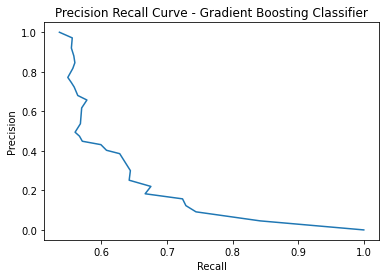

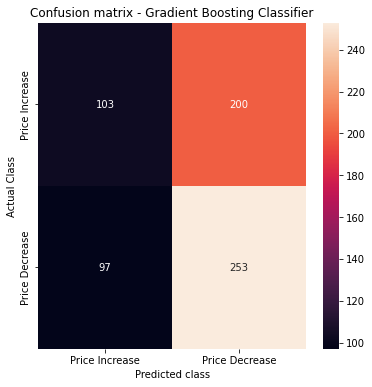

In [46]:
print("Gradient Boosting Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), top_GradientBoostPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), top_GradientBoostPredictions))
print("Recall: ",recall_score(y_test.flatten(), top_GradientBoostPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), top_GradientBoostPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), top_GradientBoostPredictions))
print(classification_report(y_test.flatten(), top_GradientBoostPredictions,
                            target_names=["Price Increase", "Price Decrease"]))

p, r, t = precision_recall_curve(y_test.flatten(), top_GradientBoostPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gradient Boosting Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), top_GradientBoostPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Price Increase', 'Price Decrease'],  
            yticklabels = ['Price Increase', 'Price Decrease'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gradient Boosting Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show()

In [47]:
top_GradientBoostModel.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [48]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a paramter object containing the values to adjust
top_GradientBoostParamGrid = {'n_estimators': [100,200,300,400],
                             'max_depth': [1,2,3]}
top_GradientBoostGrid = GridSearchCV(top_GradientBoostModel, top_GradientBoostParamGrid, verbose=3)

In [49]:
# Train the model
top_GradientBoostGrid.fit(top_X_train_scaled, top_y_train.flatten())

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .....max_depth=1, n_estimators=100;, score=0.599 total time=   0.0s
[CV 2/5] END .....max_depth=1, n_estimators=100;, score=0.599 total time=   0.0s
[CV 3/5] END .....max_depth=1, n_estimators=100;, score=0.596 total time=   0.0s
[CV 4/5] END .....max_depth=1, n_estimators=100;, score=0.606 total time=   0.0s
[CV 5/5] END .....max_depth=1, n_estimators=100;, score=0.565 total time=   0.0s
[CV 1/5] END .....max_depth=1, n_estimators=200;, score=0.599 total time=   0.0s
[CV 2/5] END .....max_depth=1, n_estimators=200;, score=0.592 total time=   0.0s
[CV 3/5] END .....max_depth=1, n_estimators=200;, score=0.596 total time=   0.0s
[CV 4/5] END .....max_depth=1, n_estimators=200;, score=0.606 total time=   0.0s
[CV 5/5] END .....max_depth=1, n_estimators=200;, score=0.565 total time=   0.0s
[CV 1/5] END .....max_depth=1, n_estimators=300;, score=0.602 total time=   0.1s
[CV 2/5] END .....max_depth=1, n_estimators=300;

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 2, 3],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=3)

In [50]:
print(top_GradientBoostGrid.best_params_)
print(top_GradientBoostGrid.best_score_)

{'max_depth': 2, 'n_estimators': 300}
0.6004071193694869


In [51]:
# Make predictions with the hyperparameter tuned model
top_GradientBoostGridPredictions = top_GradientBoostGrid.predict(top_X_test_scaled)

In [52]:
print(classification_report(top_y_test.flatten(), top_GradientBoostGridPredictions,
                            target_names=["Price Increase", "Price Decrease"]))

                precision    recall  f1-score   support

Price Increase       0.52      0.34      0.41       303
Price Decrease       0.56      0.72      0.63       350

      accuracy                           0.55       653
     macro avg       0.54      0.53      0.52       653
  weighted avg       0.54      0.55      0.53       653



In [53]:
top_hypertunedGradientBoostModel = GradientBoostingClassifier(max_depth=1, n_estimators=100)
top_hypertunedGradientBoostModel

GradientBoostingClassifier(max_depth=1)

In [54]:
top_hypertunedGradientBoostModel.fit(top_X_train_scaled, top_y_train.flatten())

GradientBoostingClassifier(max_depth=1)

In [55]:
print(f"Training Data Score: {top_hypertunedGradientBoostModel.score(top_X_train_scaled, top_y_train)}")
print(f"Testing Data Score: {top_hypertunedGradientBoostModel.score(top_X_test_scaled, top_y_test)}")

Training Data Score: 0.6055186509964231
Testing Data Score: 0.5513016845329249


In [56]:
top_hypertunedGradientBoostModelPredictions = top_hypertunedGradientBoostModel.predict(top_X_test_scaled)

In [57]:
top_hypertunedGradientBoostModelPredictProba = top_hypertunedGradientBoostModel.predict_proba(top_X_test_scaled)[:,1]

In [58]:
print(classification_report(top_y_test.flatten(), top_hypertunedGradientBoostModelPredictions,
                            target_names=["Price Increase", "Price Decrease"]))

                precision    recall  f1-score   support

Price Increase       0.55      0.20      0.29       303
Price Decrease       0.55      0.86      0.67       350

      accuracy                           0.55       653
     macro avg       0.55      0.53      0.48       653
  weighted avg       0.55      0.55      0.49       653



Gradient Boosting Classifier
Accuracy:  0.5451761102603369
Precision:  0.5584988962472406
Recall:  0.7228571428571429
F1-Score:  0.6301369863013698
AUC score:  0.5313955681282414
                precision    recall  f1-score   support

Price Increase       0.52      0.34      0.41       303
Price Decrease       0.56      0.72      0.63       350

      accuracy                           0.55       653
     macro avg       0.54      0.53      0.52       653
  weighted avg       0.54      0.55      0.53       653



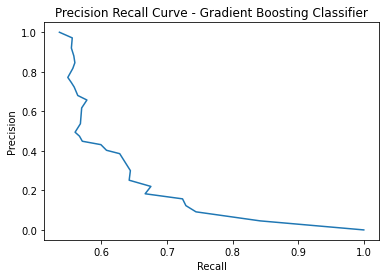

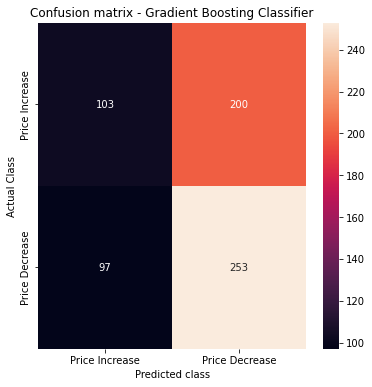

In [59]:
print("Gradient Boosting Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), top_GradientBoostPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), top_GradientBoostPredictions))
print("Recall: ",recall_score(y_test.flatten(), top_GradientBoostPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), top_GradientBoostPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), top_GradientBoostPredictions))
print(classification_report(y_test.flatten(), top_GradientBoostPredictions,
                            target_names=["Price Increase", "Price Decrease"]))

p, r, t = precision_recall_curve(y_test.flatten(), top_GradientBoostPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gradient Boosting Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), top_GradientBoostPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Price Increase', 'Price Decrease'],  
            yticklabels = ['Price Increase', 'Price Decrease'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gradient Boosting Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show()